# Tuning Tree Depth of Decision Tree Classifier

This notebook describes how you can plot the cross-validation scores as you vary the tree depth of a Decision Tree Classifier, and prune the tree at an appropriate depth to avoid overfitting.

**Load libraries and data**

We first load the required Python libraries like NumPy, Matplotlib, scikit-learn, etc.

The Iris dataset is a popular dataset for classification tasks. It contains 150 samples of 3 Iris flower species (Setosa, Versicolor, Virginica) with 4 features: sepal length, sepal width, petal length, petal width. There are 50 samples for each of the 3 target classes.

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.ticker as ticker

import warnings
warnings.filterwarnings('ignore')

**Visualize the data**

We first visualize the data by plotting pairs of features against each other and coloring the points by their target class. This gives us an idea about the separability of the classes.

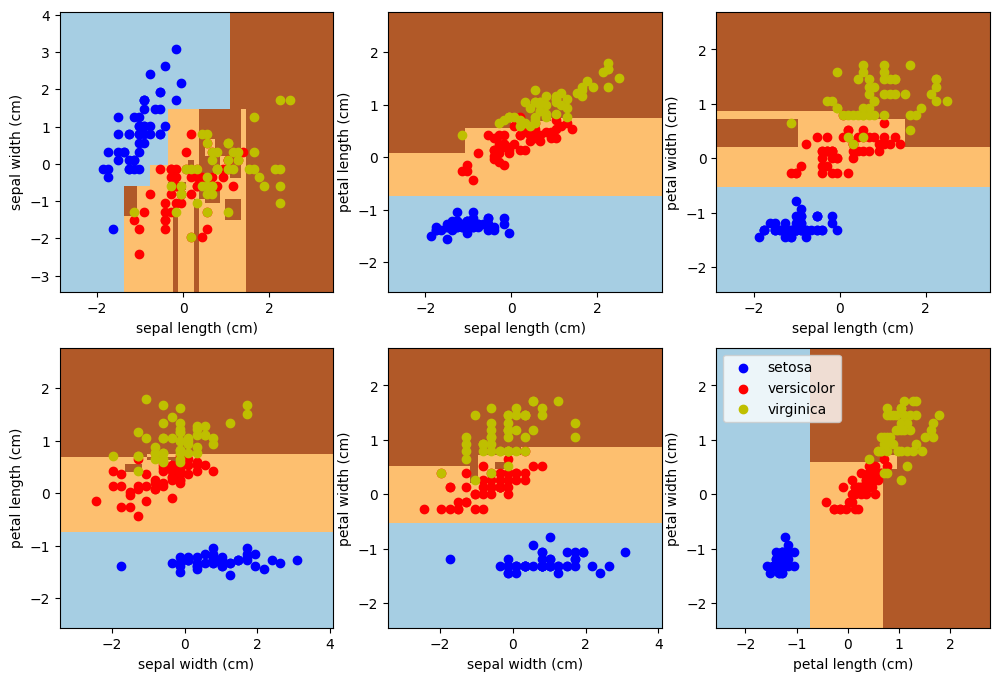

In [45]:
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02
plt.rcParams["figure.figsize"] = [12, 8]

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier(criterion='entropy').fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis()

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color,
                    label=iris.target_names[i],
                    cmap=plt.cm.Paired)
    plt.axis()

plt.legend(loc="upper left")
plt.show()


**Train an initial decision tree**

We train an initial decision tree classifier on the full Iris dataset without limiting the depth.

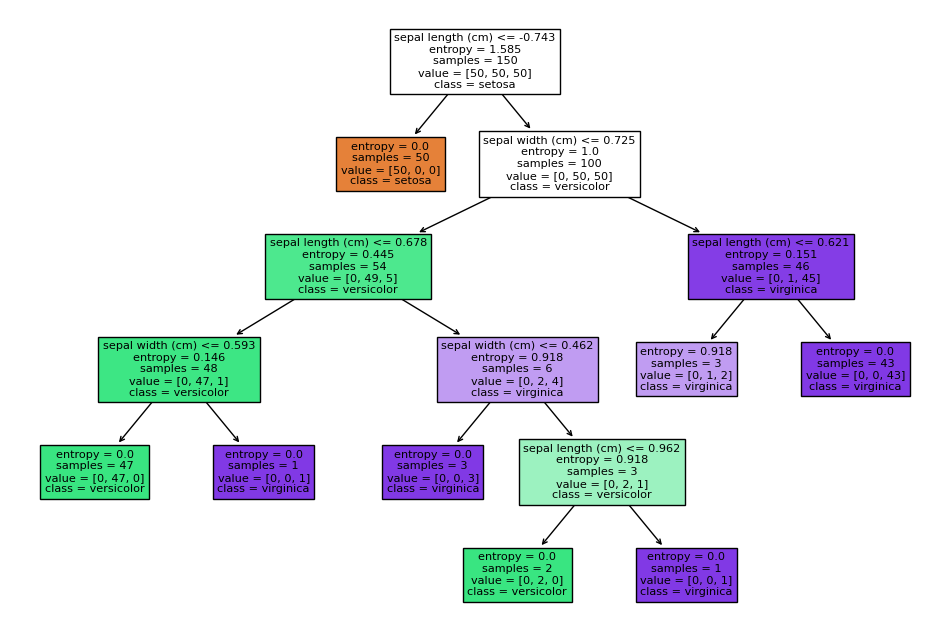

In [46]:
plt.figure()
tree.plot_tree(clf, feature_names = list(iris.feature_names), class_names=list(iris.target_names), filled = True);
plt.show()

**Compute initial cross-validation score**
We compute 5-fold cross validation scores for the initial unpruned tree. This will serve as our baseline model performance.

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
print(scores)                                              

[0.96666667 0.96666667 0.9        0.93333333 1.        ]


**Tune max depth parameter**

We iterate over different values of max_depth and compute the average cross-validation score for each depth limit. We also plot the scores to visualize the impact of tree depth on performance.

Max Depth	Avg Score
1		0.667
2		0.933
3		0.960
4		0.953
5		0.953
6		0.953
7		0.960


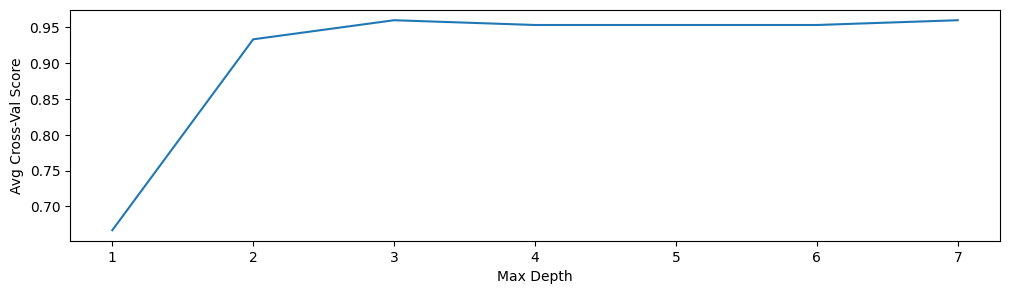

In [52]:
print("Max Depth\tAvg Score") 

depths = range(1, 8)
scores = []

for i in depths:
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i)

    # Compute cross-val score
    score = cross_val_score(clf, iris.data, iris.target, cv=5).mean() 
    scores.append(score)
    
    # Print scores 
    print("%d\t\t%.3f" % (i, score))

# Plot scores  
plt.figure(figsize=(10,3))
plt.plot(depths, scores)
plt.xlabel("Max Depth")
plt.ylabel("Avg Cross-Val Score")
plt.show()

**Select optimal tree depth**

Based on the cross-validation results, we select a max_depth of 2 (or 3) which seems to be the smallest tree that is close to the highest cross-validation score. We re-train a classifier with this optimal parameter.

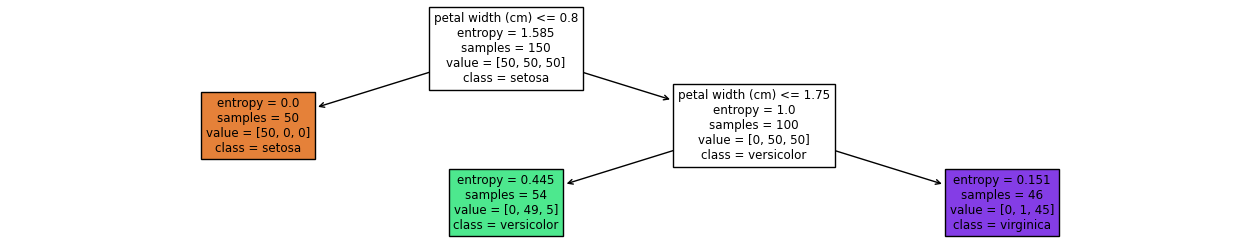

In [54]:
X = iris.data
y = iris.target

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)

clf = clf.fit(X,y)

plt.figure(figsize=(16,3))
tree.plot_tree(clf, feature_names = list(iris.feature_names), class_names=list(iris.target_names), filled = True);
plt.show()